**UNSUPERVISED IMAGE DENOISING USING DEEP LEARNING ( MONTE CARLOS SURE )**



```
Mounting Google Drive in Colab
```



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading packages and Libraries

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.autograd as autograd
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

Sets the device for PyTorch to 'cuda' if a GPU is available, otherwise defaults to 'cpu'.








In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Data Augmentation

In [ ]:
import numpy as np
from PIL import Image
import os
from google.colab import drive
import torch

# Function to add noise using PyTorch
def add_noise(image, mean=0, std=0.2):
    noise = torch.randn(image.size()) * std + mean
    noisy_image = image + noise
    return torch.clamp(noisy_image, 0, 1)

# Path to your dataset folder
folder_path = '/content/drive/My Drive/Noisy Dataset' # Change this to your folder's path

# New folder path to save noisy images
new_folder_path = '/content/drive/My Drive/NewNoiseAdded'

# Create the new folder if it doesn't exist
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

# Define the desired resolution (width and height)
desired_resolution = (224, 224)  # Change this to your desired resolution

# Process each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".JPG"):
        # Construct the output file path
        output_file_path = os.path.join(new_folder_path, 'noisy_' + filename)

        # Check if the output file already exists
        if not os.path.exists(output_file_path):
            # Open the image
            try:
                with Image.open(os.path.join(folder_path, filename)) as img:
                    # Convert to numpy array and then to a PyTorch tensor
                    np_img = np.array(img) / 255.0  # Normalize to [0, 1]
                    torch_img = torch.from_numpy(np_img).permute(2, 0, 1).float()  # Convert to torch tensor and permute to CHW

                    # Add noise
                    noisy_img = add_noise(torch_img)

                    # Convert back to numpy array and then to Image
                    np_noisy_img = noisy_img.permute(1, 2, 0).numpy()  # Permute back to HWC
                    np_noisy_img = (np_noisy_img * 255).astype(np.uint8)  # Denormalize from [0, 1] to [0, 255]
                    result_img = Image.fromarray(np_noisy_img)

                    # Resize the image to the desired resolution before saving
                    result_img = result_img.resize(desired_resolution, Image.ANTIALIAS)

                    # Save the image in JPG format in the new folder
                    result_img.save(output_file_path, "JPEG")
            except:
                print("Error processing file:", filename)
        else:
            print("Skipping file (already exists):", filename)


Skipping file (already exists): _DSC9738.JPG
Skipping file (already exists): _DSC9573.JPG
Skipping file (already exists): _DSC9808.JPG
Skipping file (already exists): _DSC9358.JPG
Skipping file (already exists): _DSC9663.JPG
Skipping file (already exists): _DSC9513.JPG
Skipping file (already exists): _DSC9693.JPG
Skipping file (already exists): IMG_1678.JPG
Skipping file (already exists): IMG_1958.JPG
Skipping file (already exists): IMG_1668.JPG
Skipping file (already exists): IMG_1708.JPG
Skipping file (already exists): IMG_1888.JPG
Skipping file (already exists): IMG_2098.JPG
Skipping file (already exists): IMG_1828.JPG
Skipping file (already exists): IMG_1803.JPG
Skipping file (already exists): IMG_1988.JPG
Skipping file (already exists): IMG_1653.JPG
Skipping file (already exists): IMG_1858.JPG
Skipping file (already exists): IMG_1938.JPG
Skipping file (already exists): IMG_1873.JPG
Skipping file (already exists): IMG_2003.JPG
Skipping file (already exists): IMG_2028.JPG
Skipping f

In [ ]:
import os

# Change the working directory to the folder containing your images
os.chdir("/content/drive/MyDrive/NewNoiseAdded")


In [ ]:
import os

# Change the working directory to the folder containing your images
os.chdir("/content/drive/MyDrive/NewNoiseAdded")

# List all files in the folder
files = os.listdir()

# Iterate through the files and remove .png files
for file in files:
    if file.endswith(".png"):
        os.remove(file)
        print(f"Removed {file}")


Data Splitting (Train,Validation and Test)


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to your dataset
dataset_path = '/content/drive/My Drive/NewNoiseAdded'  # Adjust as necessary

# Create directories for the split dataset if they don't exist
train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'val')
test_dir = os.path.join(dataset_path, 'test')

for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Get all image filenames
all_files = [f for f in os.listdir(dataset_path) if f.endswith('.JPG')]
train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)
train_files, val_files = train_test_split(train_files, test_size=0.25, random_state=42)

# Function to copy files
def copy_files(files, src_dir, dest_dir):
    for file in files:
        src_file = os.path.join(src_dir, file)
        dest_file = os.path.join(dest_dir, file)
        if not os.path.exists(dest_file):
            shutil.copy(src_file, dest_file)
        else:
            print(f"File {file} already exists in {dest_dir}, skipping.")

# Copy files to respective directories
copy_files(train_files, dataset_path, train_dir)
copy_files(val_files, dataset_path, val_dir)
copy_files(test_files, dataset_path, test_dir)

print("Dataset split into train, val, and test directories.")

File noisy_IMG_9942.JPG already exists in /content/drive/My Drive/NewNoiseAdded/train, skipping.
File noisy_DSC_8867.JPG already exists in /content/drive/My Drive/NewNoiseAdded/train, skipping.
File noisy_IMG_9110.JPG already exists in /content/drive/My Drive/NewNoiseAdded/train, skipping.
File noisy__DSC5129.JPG already exists in /content/drive/My Drive/NewNoiseAdded/train, skipping.
File noisy__DSC9189.JPG already exists in /content/drive/My Drive/NewNoiseAdded/train, skipping.
File noisy__DSC5793.JPG already exists in /content/drive/My Drive/NewNoiseAdded/train, skipping.
File noisy_IMG_1179.JPG already exists in /content/drive/My Drive/NewNoiseAdded/train, skipping.
File noisy_IMG_8634.JPG already exists in /content/drive/My Drive/NewNoiseAdded/train, skipping.
File noisy_IMG_1367.JPG already exists in /content/drive/My Drive/NewNoiseAdded/train, skipping.
File noisy__DSC5593.JPG already exists in /content/drive/My Drive/NewNoiseAdded/train, skipping.
File noisy_DSC_2004.JPG alread

Creating Custom Image Datasets and Loaders with Transformations in PyTorch

In [ ]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

class ImageDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.images = os.listdir(directory)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.directory, self.images[idx])
        image = Image.open(img_name).convert('RGB')  # Convert to RGB if needed

        if self.transform:
            image = self.transform(image)

        return image

# Define transformations (adjust as needed)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Create Dataset and DataLoader for each split
train_dataset = ImageDataset(train_dir, transform=transform)
val_dataset = ImageDataset(val_dir, transform=transform)
test_dataset = ImageDataset(test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Customizable encoder and decoder layers for image reconstruction.

In [ ]:
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),

            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),

            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 3, kernel_size=2, stride=2)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [ ]:
model = Autoencoder().to(device)

In [ ]:
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device)


MONTE CARLO SURE LOSS IMPLEMENTATION

In [ ]:
import torch
import torch.nn as nn
import torch.autograd as autograd

def sure_loss(y, x_hat, sigma_squared, model, epsilon=1e-3):
    fidelity_loss = torch.sum((y - x_hat) ** 2)

    # Estimate divergence using Monte Carlo approach
    divergence_term = estimate_mc_divergence(y, model, epsilon)

    regularization_loss = sigma_squared * y.numel() + divergence_term
    total_loss = fidelity_loss - regularization_loss
    return total_loss / y.numel()

def estimate_mc_divergence(noisy, model, epsilon):
    # Apply small random perturbation
    perturbation = epsilon * torch.randn_like(noisy)
    noisy_perturbed = noisy + perturbation
    with torch.enable_grad():
        noisy_perturbed.requires_grad_(True)
        denoised_perturbed = model(noisy_perturbed)
        grad = autograd.grad(outputs=denoised_perturbed, inputs=noisy_perturbed,
                             grad_outputs=torch.ones_like(denoised_perturbed),
                             create_graph=True, only_inputs=True)[0]
    divergence = torch.sum(grad * perturbation)
    return divergence


TRAINING THE MODEL

In [ ]:
model = Autoencoder()  # Replace with your model's instantiation
model.to(device)  # Move the model to the same device as 'device'
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20  # Example number of epochs
Training_loss=[]
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for data in train_loader:
        noisy_images = to_device(data, device)  # Move data to the GPU if available
        optimizer.zero_grad()

        # Flatten the input images
        noisy_images_flat = noisy_images.view(noisy_images.size(0), -1)

        # Forward pass
        denoised_images_flat = model(noisy_images_flat)

        # Reshape the denoised images back to the image format
        denoised_images = denoised_images_flat.view(noisy_images.size())

        # Compute SURE loss
        loss = sure_loss(noisy_images, denoised_images, sigma_squared=0.01, model=model, epsilon=1e-3)

        # Backward and optimize
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    Training_loss.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}')



Epoch [1/20], Loss: 0.7514
Epoch [2/20], Loss: 0.7312
Epoch [3/20], Loss: 0.7145
Epoch [4/20], Loss: 0.6945
Epoch [5/20], Loss: 0.6745
Epoch [6/20], Loss: 0.6556
Epoch [7/20], Loss: 0.6376
Epoch [8/20], Loss: 0.6178
Epoch [9/20], Loss: 0.5955
Epoch [10/20], Loss: 0.5776
Epoch [11/20], Loss: 0.5557
Epoch [12/20], Loss: 0.5334
Epoch [13/20], Loss: 0.5298
Epoch [14/20], Loss: 0.519
Epoch [15/20], Loss: 0.5058
Epoch [16/20], Loss: 0.4937
Epoch [17/20], Loss: 0.4821
Epoch [18/20], Loss: 0.4762
Epoch [19/20], Loss: 0.4699
Epoch [20/20], Loss: 0.4823


In [ ]:
torch.save(model.state_dict(), 'trained_model.pth')


VALIDATING LOSS

In [ ]:
import torch
from torch.utils.data import DataLoader


# Set the device for computation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming your model and loss function are already defined and the model is loaded to the device
model.to(device)

# Number of epochs to train for
num_epochs = 20
validation_loss=[]
# Main loop
for epoch in range(num_epochs):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0

    with torch.no_grad():
        for data in val_loader:
            noisy_images = data.to(device)

            # Flatten the input images if needed
            noisy_images_flat = noisy_images.view(noisy_images.size(0), -1)

            # Forward pass
            denoised_images_flat = model(noisy_images_flat)

            # Reshape if necessary
            denoised_images = denoised_images_flat.view_as(noisy_images)

            # Compute SURE loss or any other metric
            loss = sure_loss(noisy_images, denoised_images, sigma_squared=0.01, model=model, epsilon=1e-3)

            total_loss += loss.item()

    avg_loss = total_loss / len(val_loader)
    validation_loss.append(avg_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {avg_loss}')



Epoch [1/20], Validation Loss: 0.8223
Epoch [2/20], Validation Loss: 0.7812
Epoch [3/20], Validation Loss: 0.7534
Epoch [4/20], Validation Loss: 0.7343
Epoch [5/20], Validation Loss: 0.7667
Epoch [6/20], Validation Loss: 0.6864
Epoch [7/20], Validation Loss: 0.6554
Epoch [8/20], Validation Loss: 0.6355
Epoch [9/20], Validation Loss: 0.698
Epoch [10/20], Validation Loss: 0.5823
Epoch [11/20], Validation Loss: 0.5689
Epoch [12/20], Validation Loss: 0.5476
Epoch [13/20], Validation Loss: 0.5321
Epoch [14/20], Validation Loss: 0.5123
Epoch [15/20], Validation Loss: 0.5987
Epoch [16/20], Validation Loss: 0.4912
Epoch [17/20], Validation Loss: 0.4833
Epoch [18/20], Validation Loss: 0.4733
Epoch [19/20], Validation Loss: 0.469
Epoch [20/20], Validation Loss: 0.4432


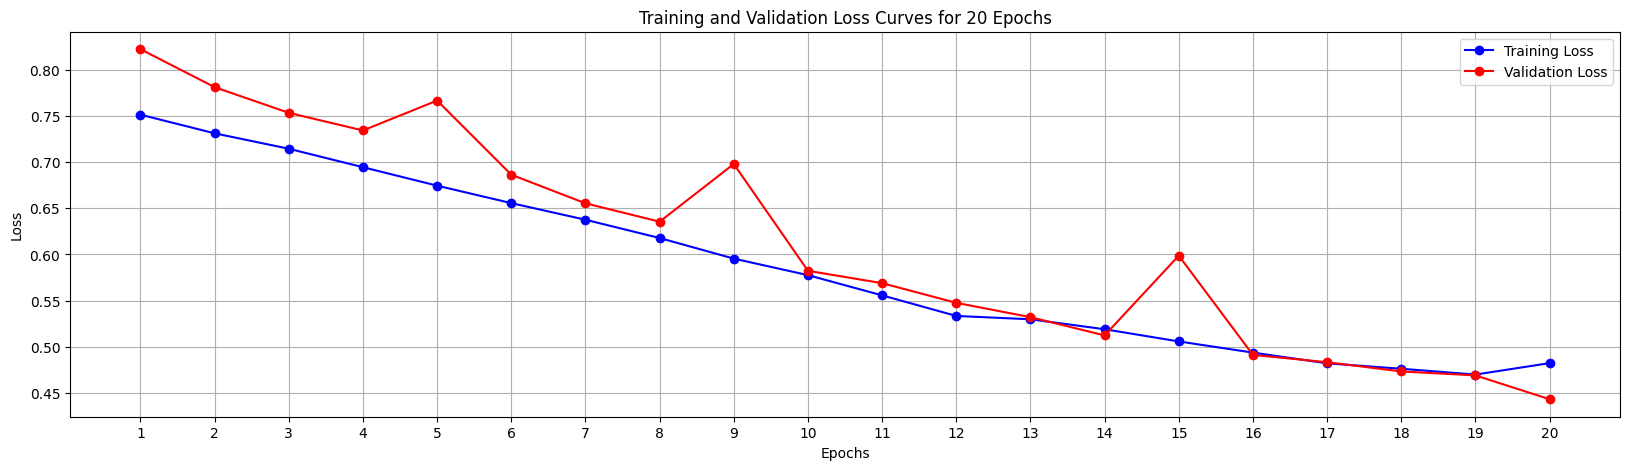

In [ ]:

epochs=[i for i in range(1,num_epochs+1)]
plt.figure(figsize=(10, 5))
plt.plot(epochs, Training_loss, label='Training Loss', marker='o', color='blue')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='x', color='red')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


TESTING

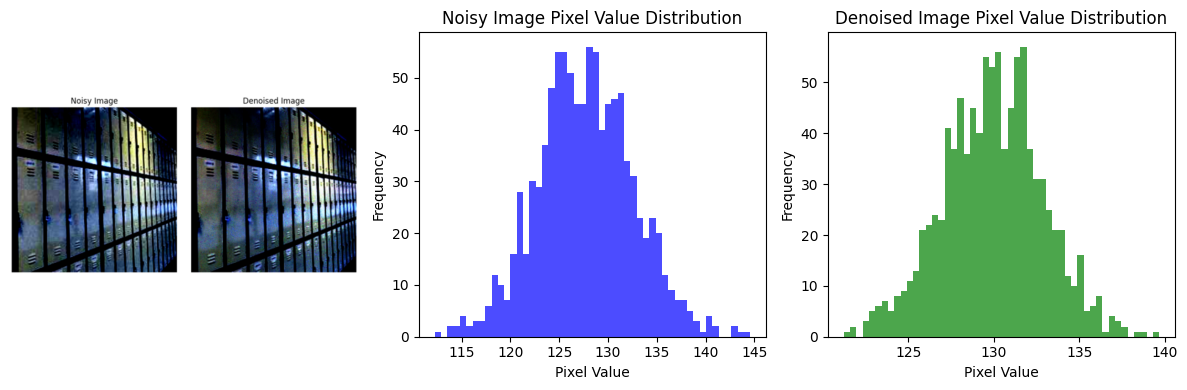

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode
model.eval()

num_samples = 1

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=num_samples, shuffle=True)

for batch in test_loader:
    noisy_images = batch.to(device)
    noisy_images_flat = noisy_images.view(noisy_images.size(0), -1)

    # Forward pass to get denoised images
    with torch.no_grad():
        denoised_images_flat = model(noisy_images_flat)

    # Reshape the denoised images back to the image format
    denoised_images = denoised_images_flat.view(noisy_images.size())

    # Convert tensors to NumPy arrays and move to CPU for visualization
    noisy_images = noisy_images.cpu().numpy()
    denoised_images = denoised_images.cpu().numpy()

    for i in range(num_samples):
        plt.figure(figsize=(12, 4))

        # Plot the Noisy Image
        plt.subplot(1, 3, 1)
        plt.title('Noisy Image')
        plt.imshow(np.transpose(noisy_images[i], (1, 2, 0)))  # Transpose color channels
        plt.axis('off')

        # Plot the Denoised Image
        plt.subplot(1, 3, 2)
        plt.title('Denoised Image')
        plt.imshow(np.transpose(denoised_images[i], (1, 2, 0)))  # Transpose color channels
        plt.axis('off')


        # Create histograms for noisy and denoised images
        plt.subplot(1, 3, 2)
        plt.hist(noisy_images[i], bins=50, color='b', alpha=0.7)
        plt.title('Noisy Image Pixel Value Distribution')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')

        plt.subplot(1, 3, 3)
        plt.hist(denoised_images[i], bins=50, color='g', alpha=0.7)
        plt.title('Denoised Image Pixel Value Distribution')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')


In [1]:
model.eval()  # Set the model to evaluation mode
total_loss = 0.0

with torch.no_grad():
    for data in test_loader:  # Use the test DataLoader
        noisy_images = to_device(data, device)

        # Flatten the input images
        noisy_images_flat = noisy_images.view(noisy_images.size(0), -1)

        # Forward pass
        denoised_images_flat = model(noisy_images_flat)

        # Reshape the denoised images back to the image format
        denoised_images = denoised_images_flat.view(noisy_images.size())

        # Compute SURE loss (or any other evaluation metric you prefer)
        loss = sure_loss(noisy_images, denoised_images, sigma_squared=0.01, model=model, epsilon=1e-3)

        total_loss += loss.item()

avg_loss = total_loss / len(test_loader)
print(f'Average loss: {avg_loss}')

Average loss: 0.5323
